# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [60]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [61]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [32]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [33]:
# The monthly amount for the member's household income
# YOUR CODE HERE
monthly_income = 12000

#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [14]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [15]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
# YOUR CODE HERE
print(json.dumps(btc_response, indent=2, sort_keys=True))

{
  "data": {
    "1": {
      "circulating_supply": 19098100,
      "id": 1,
      "last_updated": 1658283828,
      "max_supply": 21000000,
      "name": "Bitcoin",
      "quotes": {
        "USD": {
          "market_cap": 444652646094,
          "percent_change_1h": 0.833404437810147,
          "percent_change_24h": 5.47502410992114,
          "percent_change_7d": 20.3919114453767,
          "percentage_change_1h": 0.833404437810147,
          "percentage_change_24h": 5.47502410992114,
          "percentage_change_7d": 20.3919114453767,
          "price": 23297.0,
          "volume_24h": 51122485649
        }
      },
      "rank": 1,
      "symbol": "BTC",
      "total_supply": 19098100,
      "website_slug": "bitcoin"
    }
  },
  "metadata": {
    "error": null,
    "num_cryptocurrencies": 3116,
    "timestamp": 1658283828
  }
}


In [16]:
# Using the Python requests library, make an API call to access the current price ETH

eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
# YOUR CODE HERE
print(json.dumps(eth_response, indent=2, sort_keys=True))

{
  "data": {
    "1027": {
      "circulating_supply": 119746830,
      "id": 1027,
      "last_updated": 1658283833,
      "max_supply": 119746689,
      "name": "Ethereum",
      "quotes": {
        "USD": {
          "market_cap": 184468815258,
          "percent_change_1h": 0.471757829321798,
          "percent_change_24h": 1.07296216427181,
          "percent_change_7d": 48.0684443524648,
          "percentage_change_1h": 0.471757829321798,
          "percentage_change_24h": 1.07296216427181,
          "percentage_change_7d": 48.0684443524648,
          "price": 1541.09,
          "volume_24h": 23878459579
        }
      },
      "rank": 2,
      "symbol": "ETH",
      "total_supply": 119746830,
      "website_slug": "ethereum"
    }
  },
  "metadata": {
    "error": null,
    "num_cryptocurrencies": 3116,
    "timestamp": 1658283833
  }
}


#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [17]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response["data"]["1"]["quotes"]["USD"]["price"]

btc_price


23297.0

In [18]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response["data"]["1027"]["quotes"]["USD"]["price"]


eth_price
# Print the current price of ETH
# YOUR CODE HERE


1541.09

### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [22]:
# Compute the current value of the BTC holding 
btc_value = btc_price * btc_coins

btc_value

# Print current value of your holding in BTC
# YOUR CODE HERE


27956.399999999998

In [23]:
# Compute the current value of the ETH holding 
eth_value = eth_price * eth_coins

eth_value

# Print current value of your holding in ETH
# YOUR CODE HERE


8167.776999999999

In [26]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value + eth_value

total_crypto_wallet
# Print current cryptocurrency wallet balance
# YOUR CODE HERE


36124.176999999996

### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [43]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [34]:
# Set the variables for the Alpaca API and secret keys
# YOUR CODE HERE
# YOUR CODE HERE

# Create the Alpaca tradeapi.REST object
# YOUR CODE HERE

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)


In [28]:
pwd


'/Users/jchow/Desktop/fintech_workspace/week_five/Starter_Code 7'

#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [37]:
# Set the tickers for both the bond and stock portion of the portfolio
# YOUR CODE HERE

# Set timeframe to 1Day
# YOUR CODE HERE

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
# YOUR CODE HERE
# YOUR CODE HERE

# Set the tickers for both the bond and stock portion of the portfolio
tickers = ["AGG", "SPY"]

# Set timeframe to 1Day 
timeframe = "1Day"

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
start_date = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()


#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

In [38]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
# YOUR CODE HERE


portfolio_prices_df = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Reorganize the DataFrame
# # Separate ticker data
AGG = portfolio_prices_df[portfolio_prices_df['symbol']=='AGG'].drop('symbol', axis=1)
SPY = portfolio_prices_df[portfolio_prices_df['symbol']=='SPY'].drop('symbol', axis=1)

# # Concatenate the ticker DataFrames
portfolio_prices_df = pd.concat([AGG, SPY], axis=1, keys=["AGG", "SPY"])

# Review the first 5 rows of the Alpaca DataFrame
portfolio_prices_df.head()

AGG                                    \
                             open    high      low   close   volume   
timestamp                                                             
2020-08-07 04:00:00+00:00  119.66  119.73  119.395  119.43  5559066   

                                                      SPY                 \
                          trade_count        vwap    open    high    low   
timestamp                                                                  
2020-08-07 04:00:00+00:00       15246  119.475306  333.29  334.88  332.3   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2020-08-07 04:00:00+00:00  334.57  57282821      350100  333.800372

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [39]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = float(portfolio_prices_df["AGG"]["close"][0])

# Print the AGG closing price
# YOUR CODE HERE
# YOUR CODE HERE
print(f"Current AGG closing price: ${agg_close_price}")

Current AGG closing price: $119.43


In [40]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = float(portfolio_prices_df["SPY"]["close"][0])


# Print the SPY closing price
# YOUR CODE HERE
print(f"Current AGG closing price: ${spy_close_price}")

Current AGG closing price: $334.57


#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [45]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_close_price * agg_shares

# Print the current value of the bond portfolio
# YOUR CODE HERE
agg_value

23886.0

In [47]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_close_price * spy_shares

# Print the current value of the stock portfolio
# YOUR CODE HERE
spy_value

36802.7

In [48]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = agg_value + spy_value

# Print the current balance of the stock and bond portion of the portfolio
# YOUR CODE HERE
total_stocks_bonds

60688.7

In [51]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
total_portfolio = total_stocks_bonds + total_crypto_wallet

# Print current cryptocurrency wallet balance
# YOUR CODE HERE
print(f"The total value of the current savings portfolio is ${total_portfolio: 0.2f}")


The total value of the current savings portfolio is $ 96812.88


### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [52]:
# Consolidate financial assets data into a Python list
savings_data = [
    total_crypto_wallet,
    total_stocks_bonds,
]

# Review the Python list savings_data
savings_data
    

[36124.176999999996, 60688.7]

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [53]:
# Create a Pandas DataFrame called savings_df 
savings_df = pd.DataFrame(
    savings_data, 
    columns=["amount"], 
    index=["crypto", "stock/bond"]
)

# Display the savings_df DataFrame
display(savings_df)

,amount
crypto,36124.177
stock/bond,60688.700


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

<AxesSubplot:title={'center':'Total of Personal Savings'}, ylabel='amount'>

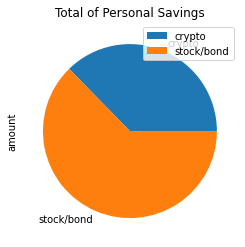

In [54]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
savings_df.plot.pie(y="amount", title="Total of Personal Savings")


#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [55]:
# Create a variable named emergency_fund_value
# YOUR CODE HERE
emergency_fund_value = monthly_income * 3


##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [56]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
if total_portfolio > emergency_fund_value:
    print("Congratulations! You have enough money in your emergency fund.")
elif total_savings == emergency_fund_value:
    print("Great, You have saved three times your monthly expenses! Keep reaching toward this important financial goal.")
else:
    print(f"You are ${(emergency_fund_value - total_savings):0.2f} away from your emergency fund goal,")

Congratulations! You have enough money in your emergency fund.


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [57]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 
start_date = pd.Timestamp('2019-07-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-07-01', tz='America/New_York').isoformat()

In [58]:
# Use the Alpaca get_bars function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
# YOUR CODE HERE
portfolio_prices_ten_df = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = portfolio_prices_ten_df[portfolio_prices_ten_df['symbol']=='AGG'].drop('symbol', axis=1)
SPY = portfolio_prices_ten_df[portfolio_prices_ten_df['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
portfolio_prices_ten_df = pd.concat([AGG, SPY], axis=1, keys=["AGG", "SPY"])

# Display both the first and last five rows of the DataFrame
display(portfolio_prices_ten_df.head())
display(portfolio_prices_ten_df.tail())


AGG                                      \
                             open      high      low   close   volume   
timestamp                                                               
2019-07-01 04:00:00+00:00  111.25  111.2700  111.010  111.18  4211486   
2019-07-02 04:00:00+00:00  111.20  111.4062  111.140  111.38  5765493   
2019-07-03 04:00:00+00:00  111.44  111.6000  111.430  111.56  1324832   
2019-07-05 04:00:00+00:00  111.21  111.2100  110.905  111.09  2461249   
2019-07-08 04:00:00+00:00  111.23  111.2600  111.030  111.03  3041397   

                                                      SPY                    \
                          trade_count        vwap    open      high     low   
timestamp                                                                     
2019-07-01 04:00:00+00:00       17456  111.152261  296.68  296.9200  294.33   
2019-07-02 04:00:00+00:00       14622  111.294019  295.59  296.4900  291.21   
2019-07-03 04:00:00+00:00        6547  111.546814  297.19  298.8200  297.02   
2019-07-05 04:00:00+00:00       10168  111.056293  297.46  298.6400  296.01   
2019-07-08 04:00:00+00:00       14684  111.126862  297.01  298.2579  296.22   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2019-07-01 04:00:00+00:00  295.66  79264778      313785  295.550961  
2019-07-02 04:00:00+00:00  296.43  62924305      243679  295.690540  
2019-07-03 04:00:00+00:00  298.80  40929346      162068  298.172623  
2019-07-05 04:00:00+00:00  298.46  51977326      229688  297.602081  
2019-07-08 04:00:00+00:00  296.82  45961732      190736  296.885773

AGG                                      \
                             open      high      low   close   volume   
timestamp                                                               
2022-06-27 04:00:00+00:00  100.68  100.9450  100.475  100.60  8262512   
2022-06-28 04:00:00+00:00  100.53  100.6600  100.395  100.64  6410634   
2022-06-29 04:00:00+00:00  100.80  101.2350  100.680  101.22  7322871   
2022-06-30 04:00:00+00:00  101.60  101.9550  101.575  101.68  7520901   
2022-07-01 04:00:00+00:00  102.21  102.7874  102.090  102.34  7274799   

                                                      SPY                    \
                          trade_count        vwap    open      high     low   
timestamp                                                                     
2022-06-27 04:00:00+00:00       33194  100.694460  391.12  391.3600  387.44   
2022-06-28 04:00:00+00:00       26098  100.579369  390.30  393.1600  380.53   
2022-06-29 04:00:00+00:00       21262  101.097062  381.16  382.2700  378.42   
2022-06-30 04:00:00+00:00       22372  101.771839  376.27  380.6582  372.56   
2022-07-01 04:00:00+00:00       26198  102.348326  376.60  381.7000  373.80   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2022-06-27 04:00:00+00:00  388.59   65967268      552197  389.085434  
2022-06-28 04:00:00+00:00  380.65   86376255      641197  384.912075  
2022-06-29 04:00:00+00:00  380.34   64478427      519970  380.393953  
2022-06-30 04:00:00+00:00  377.25  112269284      799487  377.083807  
2022-07-01 04:00:00+00:00  381.24   74165514      601221  378.221516

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [65]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
MC_thirty_year = MCSimulation(
    portfolio_data = portfolio_prices_ten_df,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252 * 30
)

# Review the simulation input data
MC_thirty_year.portfolio_data.head()


AGG                                      \
                             open      high      low   close   volume   
timestamp                                                               
2019-07-01 04:00:00+00:00  111.25  111.2700  111.010  111.18  4211486   
2019-07-02 04:00:00+00:00  111.20  111.4062  111.140  111.38  5765493   
2019-07-03 04:00:00+00:00  111.44  111.6000  111.430  111.56  1324832   
2019-07-05 04:00:00+00:00  111.21  111.2100  110.905  111.09  2461249   
2019-07-08 04:00:00+00:00  111.23  111.2600  111.030  111.03  3041397   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-07-01 04:00:00+00:00       17456  111.152261          NaN  296.68   
2019-07-02 04:00:00+00:00       14622  111.294019     0.001799  295.59   
2019-07-03 04:00:00+00:00        6547  111.546814     0.001616  297.19   
2019-07-05 04:00:00+00:00       10168  111.056293    -0.004213  297.46   
2019-07-08 04:00:00+00:00       14684  111.126862    -0.000540  297.01   

                                                                           \
                               high     low   close    volume trade_count   
timestamp                                                                   
2019-07-01 04:00:00+00:00  296.9200  294.33  295.66  79264778      313785   
2019-07-02 04:00:00+00:00  296.4900  291.21  296.43  62924305      243679   
2019-07-03 04:00:00+00:00  298.8200  297.02  298.80  40929346      162068   
2019-07-05 04:00:00+00:00  298.6400  296.01  298.46  51977326      229688   
2019-07-08 04:00:00+00:00  298.2579  296.22  296.82  45961732      190736   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-07-01 04:00:00+00:00  295.550961          NaN  
2019-07-02 04:00:00+00:00  295.690540     0.002604  
2019-07-03 04:00:00+00:00  298.172623     0.007995  
2019-07-05 04:00:00+00:00  297.602081    -0.001138  
2019-07-08 04:00:00+00:00  296.885773    -0.005495

In [66]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/jchow/Desktop/fintech_workspace/week_five/Starter_Code 7/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992115,0.994993,1.005823,1.001988,1.010065,0.993996,0.999220,0.974906,1.001941,1.004457,...,0.996360,0.998356,1.009718,0.991423,1.005028,0.990870,0.992231,0.999862,0.998393,1.009757
2,0.995525,0.990928,1.003990,0.992517,1.006850,0.999451,0.992905,0.958445,1.007672,1.003198,...,1.000638,0.998832,1.002486,0.994983,1.005160,0.989892,0.989634,1.009926,0.991767,1.035178
3,0.991907,1.005187,1.009121,1.009304,1.011221,1.009204,0.991664,0.939660,1.022921,1.012287,...,1.004642,0.998227,0.996073,0.992837,1.007678,0.999555,0.984636,1.015511,1.001110,1.027057
4,0.998419,1.001223,1.010597,1.014887,1.037677,1.005201,0.997648,0.928862,1.009106,1.001379,...,0.999094,1.006392,0.986769,0.993930,1.020191,1.001009,0.989114,1.030705,0.996497,1.028896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,6.855493,2.036722,11.814317,8.793354,4.394283,0.628328,8.092076,5.086734,16.032729,3.785224,...,4.559538,1.131141,6.096632,4.317172,10.057880,3.934502,2.269292,0.700587,6.644079,7.617744
7557,6.880621,2.057633,11.756432,8.813406,4.450252,0.638710,8.174669,5.031610,16.229791,3.744398,...,4.574967,1.128659,6.097778,4.304616,10.054311,3.963925,2.239659,0.703321,6.557531,7.638853
7558,6.757094,2.034371,11.740748,8.745481,4.504900,0.641354,8.138448,4.999887,16.316226,3.765946,...,4.502896,1.131116,6.108482,4.276765,9.953300,3.927031,2.220561,0.692045,6.552481,7.819038
7559,6.751779,2.037598,11.787937,8.760086,4.465965,0.636814,8.223583,5.064843,16.328685,3.802316,...,4.512714,1.137009,6.139214,4.309312,10.069686,3.932488,2.233950,0.682943,6.487966,7.870612


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

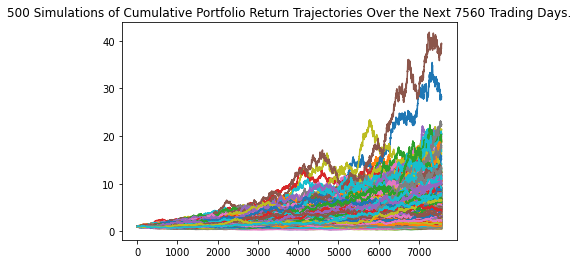

In [69]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
# YOUR CODE HERE
MC_thirty_year.plot_simulation()

#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

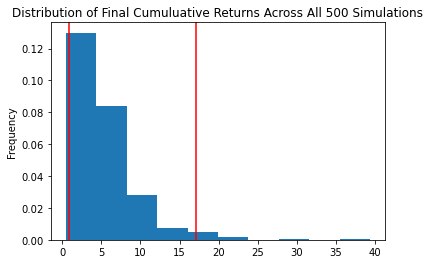

In [70]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
# YOUR CODE HERE
MC_thirty_year.plot_distribution()


#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [71]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
MC_thirty_summary_statistics = MC_thirty_year.summarize_cumulative_return()

# Review the 30-year Monte Carlo summary statistics
print(MC_thirty_summary_statistics)



count           500.000000
mean              5.214523
std               4.251507
min               0.451137
25%               2.279595
50%               4.210953
75%               6.731085
max              39.380335
95% CI Lower      0.867608
95% CI Upper     17.097435
Name: 7560, dtype: float64


### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [72]:
# Print the current balance of the stock and bond portion of the members portfolio
# YOUR CODE HERE
print(f"The current value of the stock and bond portion of the portfolio is ${total_stocks_bonds: 0.2f}")


The current value of the stock and bond portion of the portfolio is $ 60688.70


In [73]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio

ci_lower_thirty_cumulative_return = round(MC_thirty_summary_statistics[8] * total_stocks_bonds,2)
ci_upper_thirty_cumulative_return = round(MC_thirty_summary_statistics[9] * total_stocks_bonds,2)

# Print the result of your calculations
print(f"Given the current value of the stock & bond portion of the portfolio at ${total_stocks_bonds},"
      f" the cumulative return over the next 30 years is forecast to end within in the range of"
      f" ${ci_lower_thirty_cumulative_return} and ${ci_upper_thirty_cumulative_return}.")


Given the current value of the stock & bond portion of the portfolio at $60688.7, the cumulative return over the next 30 years is forecast to end within in the range of $52654.01 and $1037621.11.


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [74]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
MC_ten_year = MCSimulation(
    portfolio_data = portfolio_prices_ten_df,
    weights = [.20,.80],
    num_simulation = 500,
    num_trading_days = 252 * 10
)

# Review the simulation input data
MC_ten_year.portfolio_data.head()


AGG                                      \
                             open      high      low   close   volume   
timestamp                                                               
2019-07-01 04:00:00+00:00  111.25  111.2700  111.010  111.18  4211486   
2019-07-02 04:00:00+00:00  111.20  111.4062  111.140  111.38  5765493   
2019-07-03 04:00:00+00:00  111.44  111.6000  111.430  111.56  1324832   
2019-07-05 04:00:00+00:00  111.21  111.2100  110.905  111.09  2461249   
2019-07-08 04:00:00+00:00  111.23  111.2600  111.030  111.03  3041397   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-07-01 04:00:00+00:00       17456  111.152261          NaN  296.68   
2019-07-02 04:00:00+00:00       14622  111.294019     0.001799  295.59   
2019-07-03 04:00:00+00:00        6547  111.546814     0.001616  297.19   
2019-07-05 04:00:00+00:00       10168  111.056293    -0.004213  297.46   
2019-07-08 04:00:00+00:00       14684  111.126862    -0.000540  297.01   

                                                                           \
                               high     low   close    volume trade_count   
timestamp                                                                   
2019-07-01 04:00:00+00:00  296.9200  294.33  295.66  79264778      313785   
2019-07-02 04:00:00+00:00  296.4900  291.21  296.43  62924305      243679   
2019-07-03 04:00:00+00:00  298.8200  297.02  298.80  40929346      162068   
2019-07-05 04:00:00+00:00  298.6400  296.01  298.46  51977326      229688   
2019-07-08 04:00:00+00:00  298.2579  296.22  296.82  45961732      190736   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-07-01 04:00:00+00:00  295.550961          NaN  
2019-07-02 04:00:00+00:00  295.690540     0.002604  
2019-07-03 04:00:00+00:00  298.172623     0.007995  
2019-07-05 04:00:00+00:00  297.602081    -0.001138  
2019-07-08 04:00:00+00:00  296.885773    -0.005495

In [75]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE
MC_ten_year.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/jchow/Desktop/fintech_workspace/week_five/Starter_Code 7/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004233,1.018151,1.001496,1.011425,1.007721,1.018223,0.994962,0.985147,0.991839,1.001358,...,0.996573,0.972638,1.022268,1.009884,0.987994,0.987869,0.995732,1.002420,0.995166,1.012542
2,0.987740,1.021456,1.021842,1.000144,1.009383,1.027496,1.011339,0.982126,1.000945,1.011120,...,0.991123,0.985658,1.031803,0.999823,0.986915,0.973927,0.999709,0.994823,0.996508,0.991258
3,0.984472,1.026873,1.027290,0.995492,1.015677,1.022497,1.036768,0.989629,0.997824,1.010567,...,0.995606,0.987130,1.025689,1.013931,0.995848,0.978142,0.987633,0.982540,1.007086,0.997304
4,0.966227,1.001853,1.024252,0.997843,1.018812,1.024765,1.041231,0.984230,1.005876,1.021956,...,1.001288,0.988771,1.032024,1.008962,0.989315,0.984625,0.995769,0.991138,0.996264,1.019015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,0.954699,2.093794,4.559051,3.932013,1.840272,0.621029,2.741433,1.530349,0.841732,2.250050,...,1.528796,1.968699,2.189869,4.295548,0.506509,0.896600,2.618420,2.325253,2.375826,1.954247
2517,0.952617,2.072716,4.560408,3.944496,1.841265,0.634735,2.778454,1.517359,0.838486,2.263739,...,1.544012,1.975572,2.161090,4.288844,0.505892,0.889749,2.620598,2.371024,2.335096,1.950116
2518,0.959356,2.102178,4.564304,3.863959,1.802383,0.631517,2.711136,1.512023,0.858589,2.251561,...,1.543665,1.989188,2.209504,4.357980,0.505525,0.888091,2.676015,2.374026,2.328564,1.989067
2519,0.964819,2.139603,4.515225,3.907338,1.784311,0.637876,2.697825,1.490611,0.856622,2.261608,...,1.566662,1.985213,2.240214,4.410107,0.514763,0.896760,2.706533,2.402643,2.340163,2.016413


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

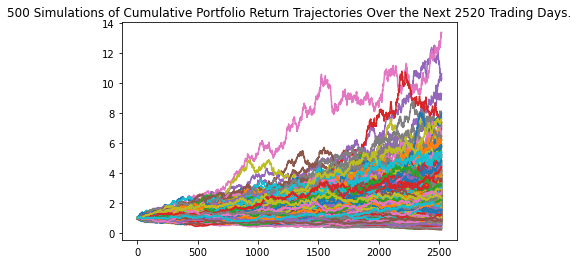

In [76]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
MC_ten_year.plot_simulation()


<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

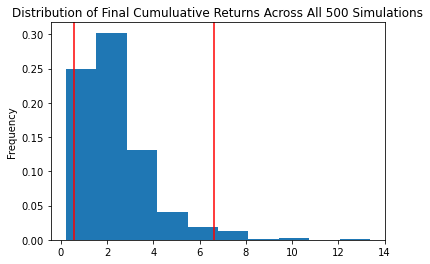

In [77]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
MC_ten_year.plot_distribution()


In [78]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
MC_ten_summary_statistics = MC_ten_year.summarize_cumulative_return()


# Review the 10-year Monte Carlo summary statistics
print(MC_ten_summary_statistics)


count           500.000000
mean              2.358659
std               1.608002
min               0.211024
25%               1.236066
50%               1.942379
75%               2.948826
max              13.372691
95% CI Lower      0.572706
95% CI Upper      6.633442
Name: 2520, dtype: float64


### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [79]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f"The current value of the stock and bond portion of the portfolio is ${total_stocks_bonds: 0.2f}")



The current value of the stock and bond portion of the portfolio is $ 60688.70


In [80]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = round(MC_ten_summary_statistics[8] * total_stocks_bonds,2)
ci_upper_ten_cumulative_return = round(MC_ten_summary_statistics[9] * total_stocks_bonds,2)

# Print the results of your analysis
print(f"Given the current value of the stock & bond portion of the portfolio at ${total_stocks_bonds},"
      f" the cumulative return over the next 10 years is forecast to end within in the range of"
      f" ${ci_lower_ten_cumulative_return} and ${ci_upper_ten_cumulative_return}.")


Given the current value of the stock & bond portion of the portfolio at $60688.7, the cumulative return over the next 10 years is forecast to end within in the range of $34756.76 and $402574.96.


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?